Title: Performance Evaluation

Task 1: Regression Metrics<br>
Use metrics like RMSE and MAE for the House Prices dataset.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332


Task 2: Classification Metrics<br>
Evaluate the Iris dataset using accuracy, precision, recall, and F1-score.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9111
Precision (macro): 0.9155
Recall (macro): 0.9111
F1-Score (macro): 0.9107

Detailed Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



Task 3: AUC-ROC Curve for Churn Model<br>
Generate an AUC-ROC curve to evaluate customer churn model performance.

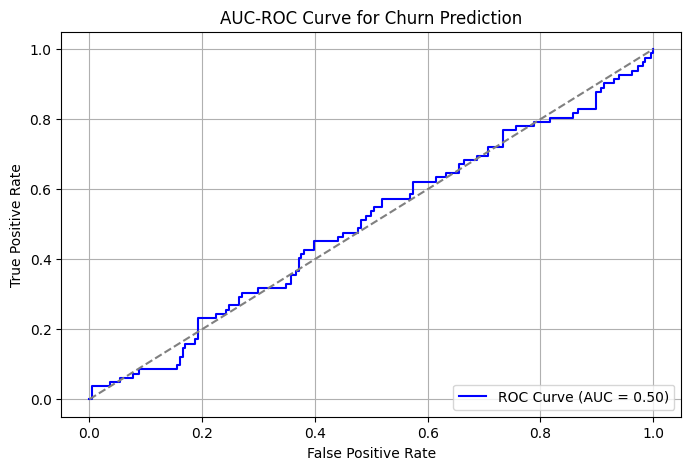

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Example: Simulated Customer Churn Dataset
# Replace with your own dataset if needed
np.random.seed(0)
size = 1000
X = pd.DataFrame({
    'tenure': np.random.randint(1, 72, size),
    'monthly_charges': np.random.uniform(20, 120, size),
    'total_charges': np.random.uniform(100, 8000, size),
})
y = np.random.choice([0, 1], size=size, p=[0.7, 0.3])  # 0: no churn, 1: churn

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC and ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Churn Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
